#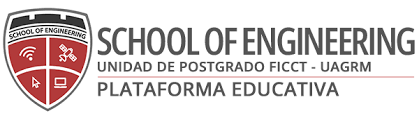

**Maestría en Ciencia de Datos e Inteligencia Artificial V1E4**
##MÓDULO 5 - Análisis Estadístico de Datos
##EDA - Análisis Exploratorio de Datos

**Universidad Autónoma Gabriel René Moreno de Santa Cruz de la Sierra-Bolivia UAGRM - POSTGRADO**<br/>
**Plataforma de streaming - Spotify**<br/>

**Nombre: Jose Carlos Camacho Salazar**


## 🎵 Quiz de Spotify
Responde las preguntas a continuación utilizando el conjunto de datos `spotify_artists.csv` proporcionado.

NOTA: Todas las respuestas deben basarse en el conjunto de datos proporcionado.

In [76]:
#importa la biblioteca pandas
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [77]:
#lee el archivo spotify_artists.csv en un dataframe
df = pd.read_csv("/content/Data set spotify artists.csv")

In [78]:
# echa un vistazo rápido a los datos con df.head()
df.head()

,name,artist,year,duration_ms,popularity,energy,danceability,tempo
0,Singende Bataillone 1. Teil,Carl Woitschach,1928,158648,0,0.1950,0.708,118.469
1,"Fantasiestücke, Op. 111: Più tosto lento",Robert Schumann,1928,282133,0,0.0135,0.379,83.972
2,Chapter 1.18 - Zamek kaniowski,Seweryn Goszczyński,1928,104300,0,0.2200,0.749,107.177
3,Bebamos Juntos - Instrumental (Remasterizado),Francisco Canaro,1928,180760,0,0.1300,0.781,108.003
4,"Polonaise-Fantaisie in A-Flat Major, Op. 61",NaN,1928,687733,1,0.2040,0.210,62.149


### 1. ¿Cuántas canciones se encuentran en el dataframe?"""


In [79]:
# tu código aquí
num_songs = len(df)
print(f"Hay {num_songs} canciones en el dataframe.")

Hay 163661 canciones en el dataframe.


In [80]:
#Echa un vistazo a tu respuesta para ver si tiene sentido
print(f"Hay {num_songs} canciones en el dataframe.")

Hay 163661 canciones en el dataframe.


### 2. ¿Cuántos días tomaría escuchar todas las canciones en este conjunto de datos?

NOTA: Redondea la respuesta al número entero más cercano


In [81]:
#tu código aquí
total_duration_ms = df['duration_ms'].sum()
total_duration_days = round(total_duration_ms / (1000 * 60 * 60 * 24))
answer2 = total_duration_days

In [82]:
#Echa un vistazo a tu respuesta para ver si tiene sentido
print(f"Tomaria un total de {answer2} dias para escuchar todas las canciones")

Tomaria un total de 437 dias para escuchar todas las canciones


### 3. En el dataframe, ¿cuántas canciones tienen el título "Love" (coincidencia exacta)?


In [83]:
#tu código aquí
answer3 = df[df['name'] == 'Love'].shape[0]

In [84]:
#Echa un vistazo a tu respuesta para ver si tiene sentido
print(f"Hay un total de {answer3} canciones que tienen el tiulo de Love")

Hay un total de 18 canciones que tienen el tiulo de Love


### 4. ¿Qué artista creó la canción más popular titulada "Love"?

Para ordenar una serie por valores hemos utilizado:
`serie.sort_values()`

Para un dataframe, df.sort_values() requiere ademas la columna especifica utilizar como argumento:

`df.sort_values(by='Nombre de la columna')`

Puedes ver la documentacion para obtener mas informacion [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)


In [85]:
#tu código aquí
love_songs = df[df['name'] == 'Love']
most_popular_love_song = love_songs.sort_values(by='popularity', ascending=False).iloc[0]
answer4 = most_popular_love_song['artist']

In [86]:
#Echa un vistazo a tu respuesta para ver si tiene sentido
print(f"El/La artista que creo la canion mas popular con el titulo de LOVE es: {answer4}")

El/La artista que creo la canion mas popular con el titulo de LOVE es: Lana Del Rey


### 5. ¿En qué década se lanzaron la mayoría de las canciones?

SUGERENCIA: Deberás encontrar el número total de canciones lanzadas en cada década y proceder a partir de ahí.

NOTA: si tu respuesta es los 80, la respuesta debe ser 1980.

In [87]:
# tu código aquí
df['decade'] = (df['year'] // 10) * 10
songs_per_decade = df['decade'].value_counts()
most_popular_decade = songs_per_decade.idxmax()
answer5 = most_popular_decade

In [88]:
#Echa un vistazo a tu respuesta para ver si tiene sentido
print(f"La decada que tuvo mas lanzamientos musicales es {answer5}")

La decada que tuvo mas lanzamientos musicales es 1990


### 6. ¿Qué columna tiene datos faltantes?
SUGERENCIA: Puedes revisar el metodo df.isnull() o df.isna()


In [89]:
#tu código aquí
missing_data = df.isnull().sum()
column_with_missing_data = missing_data[missing_data > 0]
print(column_with_missing_data)

artist    871
dtype: int64


In [90]:
#Echa un vistazo a tu respuesta para ver si tiene sentido
print(column_with_missing_data)
print(f"La columna que tiene datos faltantes es: {column_with_missing_data.index[0]}")

artist    871
dtype: int64
La columna que tiene datos faltantes es: artist


#### Elimina todos los valores faltantes para responder al siguiente conjunto de preguntas.

Si el dataframe contiene valores faltantes, puedes eliminarlos utilizando el siguiente método:

`df.dropna(inplace=True)`

Este método busca elementos faltantes en el dataframe y, si encuentra alguno, elimina toda la fila correspondiente a la celda faltante.

Puedes encontrar más información en la documentación
[here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna)

In [91]:
# tu código aquí
df.dropna(inplace=True)

In [92]:
num_songs = len(df)
print(f"Hay {num_songs} canciones en el dataframe.")

Hay 162790 canciones en el dataframe.


### 7. Analisis del tempo de las canciones

Utilizar el comando `print(f"...")` donde corresponda para responder a las siguientes preguntas

Para los artistas con una popularidad mayor a 90 y cuyas canciones han sido lanzadas despues del 2015, encontrar la siguiente informacion:

- ¿Cuál es la canción más rápida en términos de tempo y en qué año fue lanzada?
- ¿Cuál es la canción más lenta en términos de tempo y en qué año fue lanzada?
- ¿Graficar el numero de canciones que fueron lanzadas por año y identificar cuál fue año con más canciones?


La canción más rápida es 'Stuck with U (with Justin Bieber)' lanzada en 2020.
La canción más lenta es 'HIGHEST IN THE ROOM' lanzada en 2019.
El año con más canciones lanzadas es: 2019


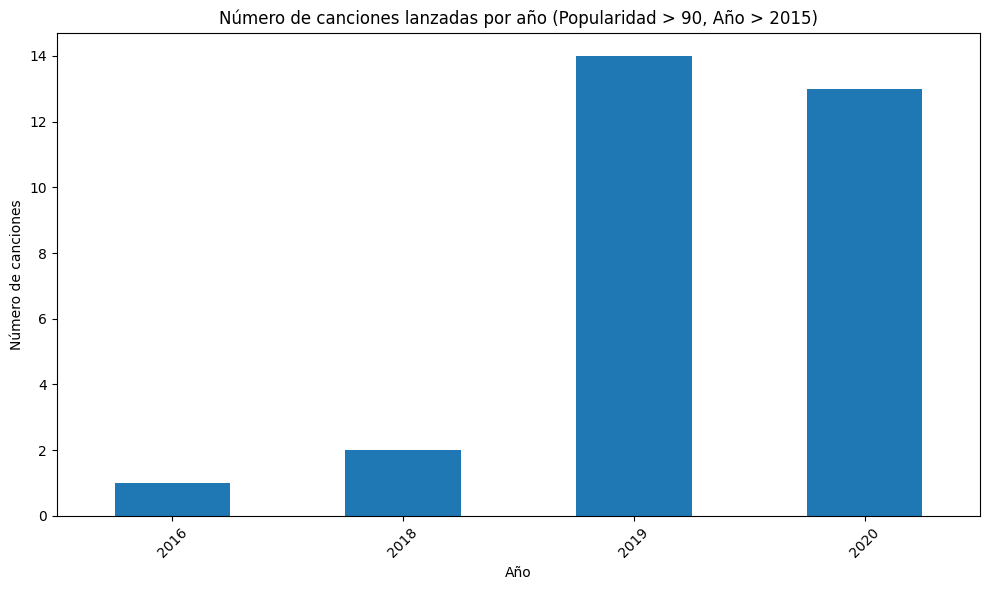

In [93]:
# tu código aquí
df_filtered = df[(df['popularity'] > 90) & (df['year'] > 2015)].copy()
fastest_song = df_filtered.loc[df_filtered['tempo'].idxmax()]
slowest_song = df_filtered.loc[df_filtered['tempo'].idxmin()]
songs_per_year = df_filtered['year'].value_counts().sort_index()

print(f"La canción más rápida es '{fastest_song['name']}' lanzada en {fastest_song['year']}.")
print(f"La canción más lenta es '{slowest_song['name']}' lanzada en {slowest_song['year']}.")
print(f"El año con más canciones lanzadas es: {songs_per_year.idxmax()}")

plt.figure(figsize=(10, 6))
songs_per_year.plot(kind='bar')
plt.title('Número de canciones lanzadas por año (Popularidad > 90, Año > 2015)')
plt.xlabel('Año')
plt.ylabel('Número de canciones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 8. Analisis del tiempo de duracion de las canciones
Utilizar el comando `print(f"...")` para responder a las siguientes preguntas

- ¿Cuál es la canción más larga en términos de duración en milisegundos y quién es el artista que la interpreta?

- ¿Cuál es la canción más popular en términos de valor de popularidad y en qué año fue lanzada?

In [94]:
#tu código aquí

longest_song = df.loc[df['duration_ms'].idxmax()]
print(f"La canción más larga es '{longest_song['name']}' interpretada por {longest_song['artist']}.")

most_popular_song = df.loc[df['popularity'].idxmax()]
print(f"La canción más popular es '{most_popular_song['name']}' lanzada en {most_popular_song['year']}.")

La canción más larga es 'Brown Noise - 90 Minutes' interpretada por Sound Dreamer.
La canción más popular es 'death bed (coffee for your head) (feat. beabadoobee)' lanzada en 2020.


### 9. ¿Cuál es la canción más enérgica de Michael Jackson?

In [95]:
#tu código aquí
michael_jackson_songs = df[df['artist'] == 'Michael Jackson']
most_energetic_mj_song = michael_jackson_songs.loc[michael_jackson_songs['energy'].idxmax()]
answer9 = most_energetic_mj_song['name']
print(f"La canción más enérgica de Michael Jackson es: {answer9}")

La canción más enérgica de Michael Jackson es: Smooth Criminal - 2012 Remaster


### 10 ¿Qué artista ha lanzado la mayor cantidad de canciones desde 1960?


In [96]:
# tu código aquí
songs_since_1960 = df[df['year'] >= 1960]
artist_song_counts = songs_since_1960['artist'].value_counts()
most_prolific_artist = artist_song_counts.idxmax()
print(f"El artista que ha lanzado la mayor cantidad de canciones desde 1960 es: {most_prolific_artist}")

El artista que ha lanzado la mayor cantidad de canciones desde 1960 es: Bob Dylan


### 11 Para el artista de la pregunta anterior, ¿cuál es la canción más popular?

In [97]:
# tu código aquí
most_prolific_artist_songs = df[df['artist'] == most_prolific_artist]
most_popular_prolific_artist_song = most_prolific_artist_songs.sort_values(by='popularity', ascending=False).iloc[0]
answer11 = most_popular_prolific_artist_song['name']
print(f"La canción más popular de {most_prolific_artist} es: {answer11}")

La canción más popular de Bob Dylan es: Knockin' On Heaven's Door


### 12. Crear un playlist con las canciones mas populares

Crea una `lista` de reproducción con la canción más popular de cada año desde 1980 hasta 2020.

El resultado debe ser de tipo List con 41 valores de tipo str (una canción para cada año)
p.ej. ['cancion1', 'cancion2', 'cancion3', ...]
NOTA: En caso de empates, elige la canción con el valor más alto de energy.

In [98]:
# tu código aquí
playlist = []
for year in range(1980, 2022):
    songs_in_year = df[df['year'] == year]
    if not songs_in_year.empty:
        most_popular_song_year = songs_in_year.sort_values(by=['popularity', 'energy'], ascending=[False, False]).iloc[0]
        playlist.append(most_popular_song_year['name'])

answer_12 = playlist

print("Esta es la playlist con las canciones mas populares que van desde los años 80 hasta el 2020")
print(answer_12)

Esta es la playlist con las canciones mas populares que van desde los años 80 hasta el 2020
['Back In Black', "Don't Stop Believin'", 'Africa', 'Every Breath You Take', 'Wake Me up Before You Go-Go', 'Take on Me', "Livin' On A Prayer", 'I Wanna Dance with Somebody (Who Loves Me)', 'Fast Car', "Free Fallin'", 'Thunderstruck', 'Under the Bridge', 'Killing In The Name', 'Creep', 'Basket Case', "Gangsta's Paradise", 'Wannabe', 'Bitter Sweet Symphony', "The Kids Aren't Alright", 'Californication', 'In the End', 'Chop Suey!', "'Till I Collapse", 'Numb', 'Yeah! (feat. Lil Jon & Ludacris)', "Hips Don't Lie (feat. Wyclef Jean)", 'Snow (Hey Oh)', 'Stronger', 'Umbrella', 'Bad Romance', 'Hey, Soul Sister', 'Pumped Up Kicks', "Can't Hold Us - feat. Ray Dalton", 'All of Me', 'Photograph', 'Play Date', 'goosebumps', 'Believer', 'SICKO MODE', 'ily (i love you baby) (feat. Emilee)', 'death bed (coffee for your head) (feat. beabadoobee)']


### 13 ¿Cómo se distribuye la popularidad de las canciones en forma de histograma?
Crea un grafico para responder esta pregunta


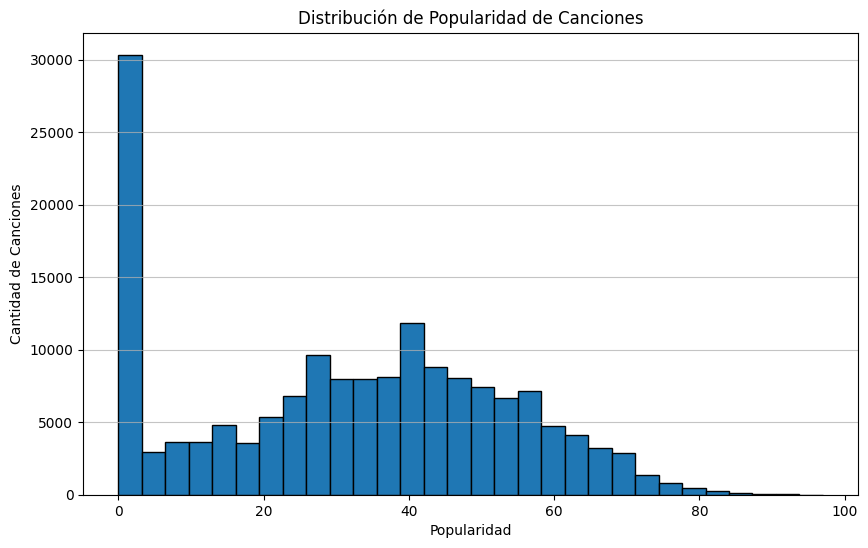

Podemos apreciar que hay una gran cantidad de Canciones las cuales tienen una popularidad de casi Cero, en cambio vemos que la mayoria de las canciones tienen una popularidad entre 30 y 60 porciento


In [99]:
# tu código aquí
plt.figure(figsize=(10, 6))
plt.hist(df['popularity'], bins=30, edgecolor='black')
plt.title('Distribución de Popularidad de Canciones')
plt.xlabel('Popularidad')
plt.ylabel('Cantidad de Canciones')
plt.grid(axis='y', alpha=0.75)
plt.show()
print("Podemos apreciar que hay una gran cantidad de Canciones las cuales tienen una popularidad de casi Cero, en cambio vemos que la mayoria de las canciones tienen una popularidad entre 30 y 60 porciento")

### 14 ¿existe una correlación entre la duración de las canciones y su nivel de energía? Representa esta relación en un scatter plot.
Crea un grafico para responder esta pregunta

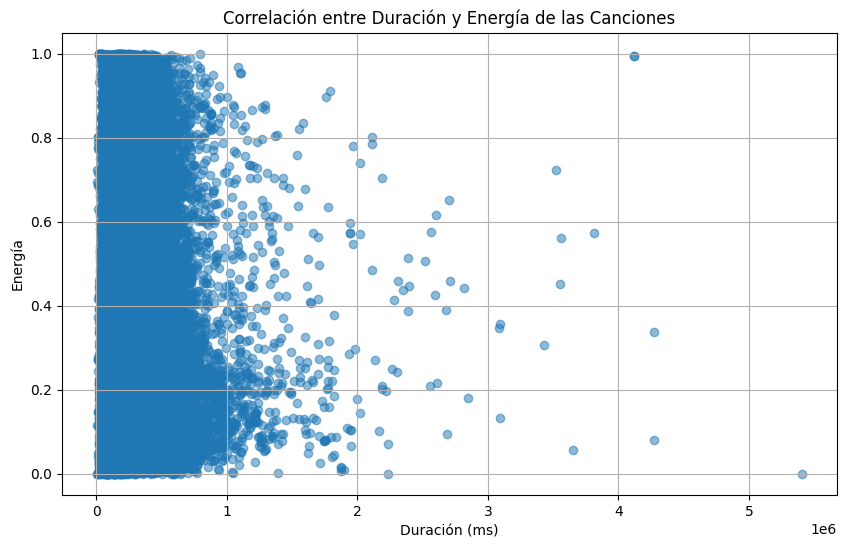

No existe una correlación evidente entre duración y energía, ya que los puntos están dispersos sin seguir una tendencia clara. Esto indica que la duración, no determina el nivel de energía de una canción.


In [100]:
# tu código aquí
plt.figure(figsize=(10, 6))
plt.scatter(df['duration_ms'], df['energy'], alpha=0.5)
plt.title('Correlación entre Duración y Energía de las Canciones')
plt.xlabel('Duración (ms)')
plt.ylabel('Energía')
plt.grid(True)
plt.show()
print("No existe una correlación evidente entre duración y energía, ya que los puntos están dispersos sin seguir una tendencia clara. Esto indica que la duración, no determina el nivel de energía de una canción.")

### 15 ¿Cuál es la distribución de la danceability de las canciones en función del año de lanzamiento?
Crea un gráfico de barras para mostrar esta distribución.

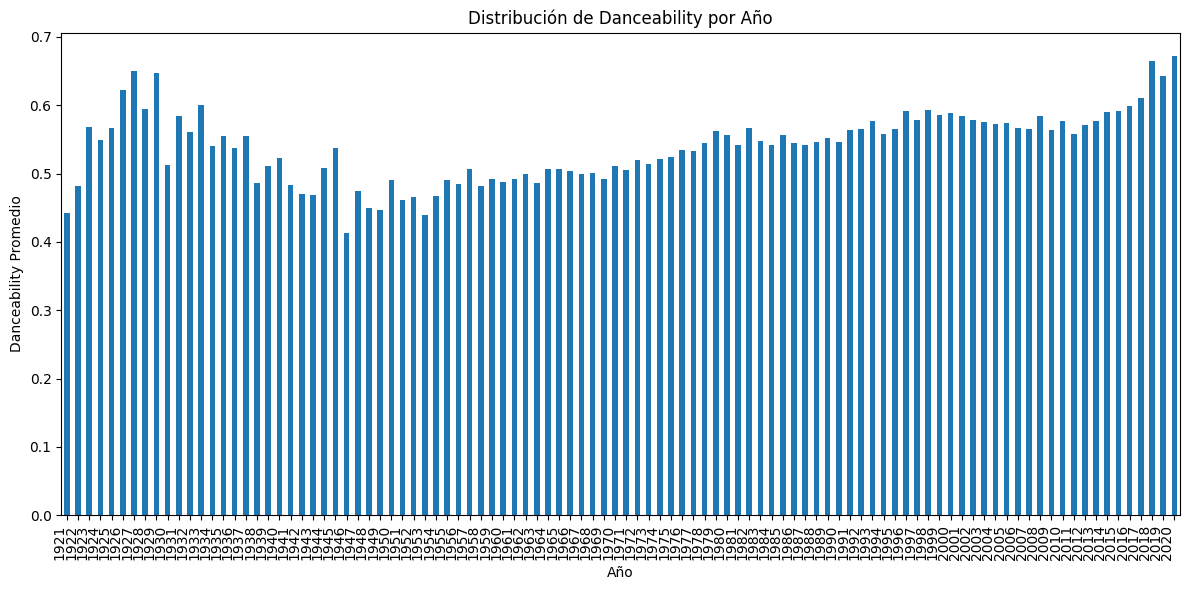

El gráfico muestra la evolución del promedio de "danceability" por año. Se observa que entre los primeros años hay valores relativamente altos (alrededor de 0.6), luego hay una disminución hacia valores cercanos a 0.45 en años intermedios, y finalmente una tendencia ascendente en los últimos años, llegando a superar 0.65. Esto indica que la música reciente tiende a ser más bailable en comparación con décadas anteriores.


In [101]:
# tu código aquí
average_danceability_per_year = df.groupby('year')['danceability'].mean()

plt.figure(figsize=(12, 6))
average_danceability_per_year.plot(kind='bar')
plt.title('Distribución de Danceability por Año')
plt.xlabel('Año')
plt.ylabel('Danceability Promedio')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()
print("El gráfico muestra la evolución del promedio de \"danceability\" por año. Se observa que entre los primeros años hay valores relativamente altos (alrededor de 0.6), luego hay una disminución hacia valores cercanos a 0.45 en años intermedios, y finalmente una tendencia ascendente en los últimos años, llegando a superar 0.65. Esto indica que la música reciente tiende a ser más bailable en comparación con décadas anteriores.")

### 16 ¿Cómo varía el tempo de las canciones a lo largo de los años?
Representa esta variación utilizando un gráfico de línea.


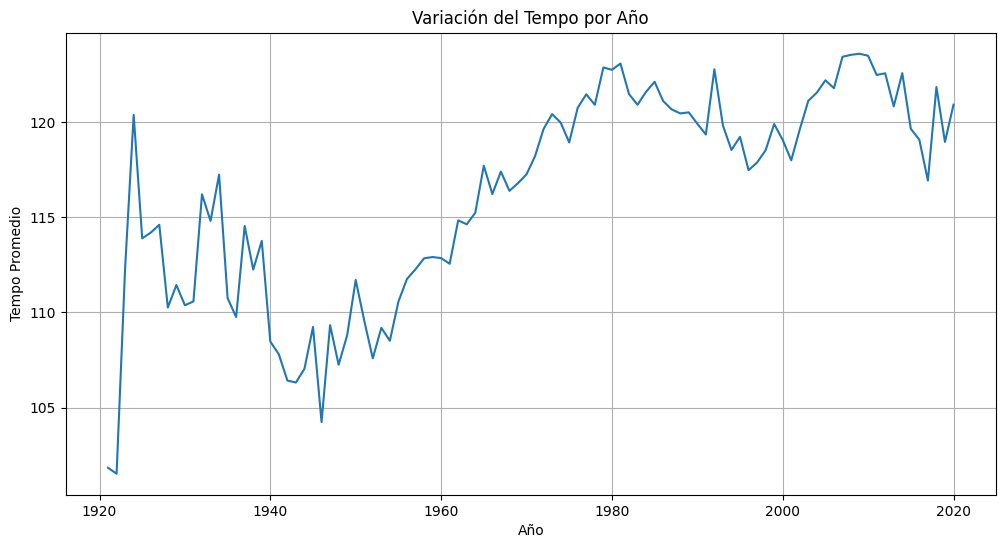

El tempo promedio ha aumentado desde los años 40 hasta los 80, pasando de ~105 a más de 120 BPM, manteniéndose relativamente alto y estable en las últimas décadas.


In [102]:
# tu código aquí
average_tempo_per_year = df.groupby('year')['tempo'].mean()

plt.figure(figsize=(12, 6))
average_tempo_per_year.plot(kind='line')
plt.title('Variación del Tempo por Año')
plt.xlabel('Año')
plt.ylabel('Tempo Promedio')
plt.grid(True)
plt.show()
print("El tempo promedio ha aumentado desde los años 40 hasta los 80, pasando de ~105 a más de 120 BPM, manteniéndose relativamente alto y estable en las últimas décadas.")

### 17 ¿Cuál es la relación entre la popularidad y la energía de las canciones?
Crea un scatter plot para visualizar esta relación.


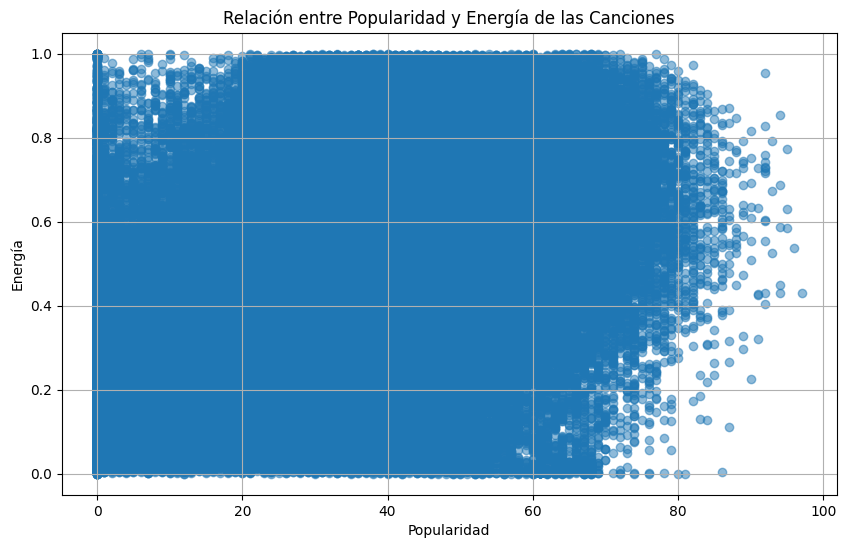

No se observa una correlación clara entre popularidad y energía; las canciones populares presentan niveles de energía variados, desde bajos hasta altos.


In [103]:
# tu código aquí
plt.figure(figsize=(10, 6))
plt.scatter(df['popularity'], df['energy'], alpha=0.5)
plt.title('Relación entre Popularidad y Energía de las Canciones')
plt.xlabel('Popularidad')
plt.ylabel('Energía')
plt.grid(True)
plt.show()
print ("No se observa una correlación clara entre popularidad y energía; las canciones populares presentan niveles de energía variados, desde bajos hasta altos.")

### 18 ¿Cuál es la tendencia de cambio en la duración de las canciones a lo largo de los años?
Utiliza un gráfico de línea para mostrar esta tendencia.

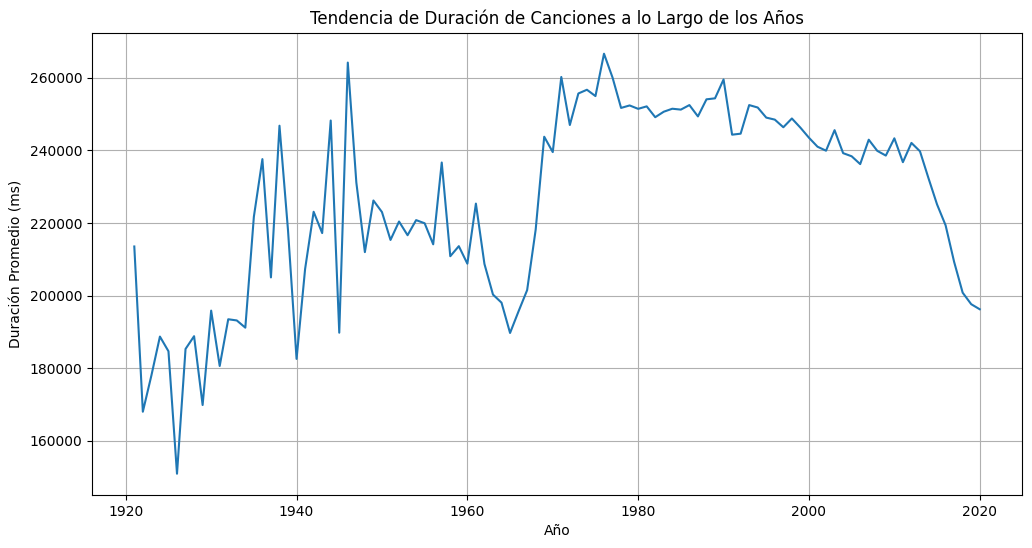

La duración promedio de las canciones aumentó desde los años 30 hasta los 80, pero muestra una tendencia a disminuir en las últimas décadas.


In [104]:
# tu código aquí
average_duration_per_year = df.groupby('year')['duration_ms'].mean()

plt.figure(figsize=(12, 6))
average_duration_per_year.plot(kind='line')
plt.title('Tendencia de Duración de Canciones a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Duración Promedio (ms)')
plt.grid(True)
plt.show()
print("La duración promedio de las canciones aumentó desde los años 30 hasta los 80, pero muestra una tendencia a disminuir en las últimas décadas.")

### 19  ¿Cuál es la energía promedio de todas las canciones de 'Michael Jackson'?
Para obtener el promedio de los valores en una columna de tipo numerico, puede utilizar el metodo

`df["nombre de la columna"].mean()`

In [105]:
# tu código aquí
michael_jackson_songs = df[df['artist'] == 'Michael Jackson']
average_energy_mj = michael_jackson_songs['energy'].mean()
print(f"La energía promedio de las canciones de Michael Jackson es: {average_energy_mj:.2f}")

La energía promedio de las canciones de Michael Jackson es: 0.69


### 20 ¿Cuántos artistas únicos están representados en el dataframe?
Para contar los elementos unicos en un dataframe puedes utilizar el metodo:

`df["nombre de la columna"].unique()`


In [106]:
# tu código aquí
num_unique_artists = df['artist'].nunique()
print(f"Hay {num_unique_artists} artistas únicos representados en el dataframe.")

Hay 19695 artistas únicos representados en el dataframe.
